In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.datasets import load_breast_cancer

from bertsimas_stable.stable_trainer import StableTrainer

In [ ]:
data_bc = load_breast_cancer(as_frame=True)
X_full = data_bc["data"]
y_full = data_bc["target"]

N_SPLITS = 10
test_size = 0.33

cart_accuracies = []
rf_accuracies = []
stable_accuracies = []
stable_distances = []

In [ ]:
# X0, X_rest, y0, y_rest = train_test_split(X_full, y_full, test_size=0.5, random_state=42)
# X_test, X_validate, y_test, y_validate = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

stable_model = StableTrainer(depths=[3,5,7], min_samples_leaf=[5,10], random_state=42, max_depth_for_lambda=7)

stable_model.train_stable(X_train, y_train, X_full, y_full, X_test, y_test)
# print("Distances:", trainer.distances_)
# print("Performances:", trainer.performances_)
# print("Pareto indices:", trainer.pareto_indices_)

In [ ]:
for i in range(N_SPLITS):
    X_train, X_test, y_train, y_test = train_test_split(
        X_full, y_full, test_size=test_size, random_state=i
    )
    
    cart = DecisionTreeClassifier(random_state=i)
    cart.fit(X_train, y_train)

    rf = RandomForestClassifier(random_state=i)
    rf.fit(X_train, y_train)
    
    stable_model = StableTrainer(depths=[3,5,7], min_samples_leaf=[5,10], random_state=i, max_depth_for_lambda=7)
    stable_model.train_stable(X_train, y_train, X_full, y_full, X_test, y_test)
    
    cart_y_pred = cart.predict(X_test)
    cart_acc = accuracy_score(y_test, cart_y_pred)
    cart_accuracies.append(cart_acc)
    
    rf_y_pred = rf.predict(X_test)
    rf_acc = accuracy_score(y_test, rf_y_pred)
    rf_accuracies.append(rf_acc)
    
    
        # def train_stable(
        #     self,
        #     X0, y0,
        #     X_full, y_full,
        #     X_test=None, y_test=None):
        # """
        # The main interface method that:
        #  1) Trains collection T0 from (X0, y0)
        #  2) Trains collection T  from (X_full, y_full)
        #  3) Computes distances from T to T0
        #  4) Computes performance on (X_test, y_test) if provided
        #  5) Identifies Pareto frontier
        #  6) Selects a final stable tree
        # Returns self for chaining.
        # """
    #     # 4) Performance
    # self.performances_ = []
    # if X_test is not None and y_test is not None:
    #     for tree_b in self.T_:
    #         y_pred = tree_b.predict(X_test)
    #         acc = accuracy_score(y_test, y_pred)
    #         self.performances_.append(acc)
    # else:
    #     # If no test set is given, we can do in-sample performance on X_full
    #     # or just placeholder zeros
    #     for tree_b in self.T_:
    #         acc = accuracy_score(y_full, tree_b.predict(X_full))
    #         self.performances_.append(acc)
    # stable_tree_
    
    # 5) Select a final stable tree
    stable_y
    stable_y_pred = stable_model(X_test=X_test, y_test=y_test)
    
#     performances = []
# for i, tree_b in enumerate(T):
#     # Evaluate performance on holdout test set for demonstration
#     y_pred = tree_b.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     performances.append(acc)
    

    stable_acc = accuracy_score(y_test, stable_y_pred)
    stable_accuracies.append(stable_acc)
    
    # 6) If you measure stability distance for the stable model, do it here
    # For example, if measuring average distance to some baseline T0:
    # stable_dist = measure_distance(stable_model, T0_list, global_lower, global_upper)
    # stable_distances.append(stable_dist)

[INFO] Training first collection (T0)...
  -> T0: 6 trees
[INFO] Training second collection (T)...
  -> T: 6 trees
[INFO] Final chosen stable tree index = 3, distance = 7.2107, perf = 0.9734


AttributeError: 'StableTrainer' object has no attribute 'predict'

In [2]:
# After the loop, compute mean and std for each
cart_mean_acc, cart_std_acc = np.mean(cart_accuracies), np.std(cart_accuracies)
rf_mean_acc,   rf_std_acc   = np.mean(rf_accuracies),   np.std(rf_accuracies)
stable_mean_acc, stable_std_acc = np.mean(stable_accuracies), np.std(stable_accuracies)

# stable_dist_mean, stable_dist_std = np.mean(stable_distances), np.std(stable_distances)

print("==== Final Results over 10 splits (mean ± std) ====")
print(f"CART Accuracy:        {cart_mean_acc:.3f} ± {cart_std_acc:.3f}")
print(f"Random Forest Acc:    {rf_mean_acc:.3f} ± {rf_std_acc:.3f}")
print(f"Stable Approach Acc:  {stable_mean_acc:.3f} ± {stable_std_acc:.3f}")
# print(f"Stable Approach Dist: {stable_dist_mean:.3f} ± {stable_dist_std:.3f}")

# Optionally create a summary DataFrame
summary_df = pd.DataFrame({
    'Model': ['CART', 'RandomForest', 'StableApproach'],
    'MeanAcc': [cart_mean_acc, rf_mean_acc, stable_mean_acc],
    'StdAcc':  [cart_std_acc, rf_std_acc, stable_std_acc],
    # 'MeanDist': [...],
    # 'StdDist':  [...],
})
print(summary_df)

NameError: name 'cart_accuracies' is not defined

In [ ]:
# print("Distances:", trainer.distances_)
# print("Performances:", trainer.performances_)
# print("Pareto indices:", trainer.pareto_indices_)

Distances: [np.float64(7.920043502915717), np.float64(7.517774676963081), np.float64(7.834934221949138), np.float64(8.040571280255074), np.float64(7.806994572338195), np.float64(8.046485572089601)]
Performances: [0.9788732394366197, 0.9507042253521126, 0.9788732394366197, 0.9507042253521126, 0.9788732394366197, 0.9436619718309859]
Pareto indices: [1, 4]


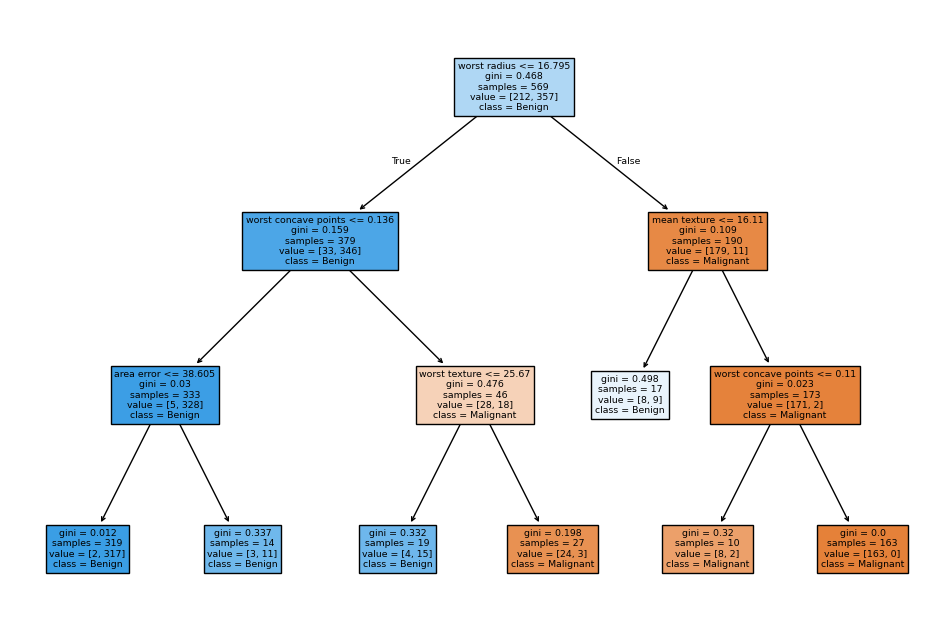

In [ ]:
# trainer.plot_stable_tree(feature_names=X_full.columns.tolist(),
#                          class_names=["Malignant", "Benign"])